In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("amanrajput16/used-car-price-data-from-cars24")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\gaikw\.cache\kagglehub\datasets\amanrajput16\used-car-price-data-from-cars24\versions\1


In [3]:
df = pd.read_csv(path+"/cars24data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


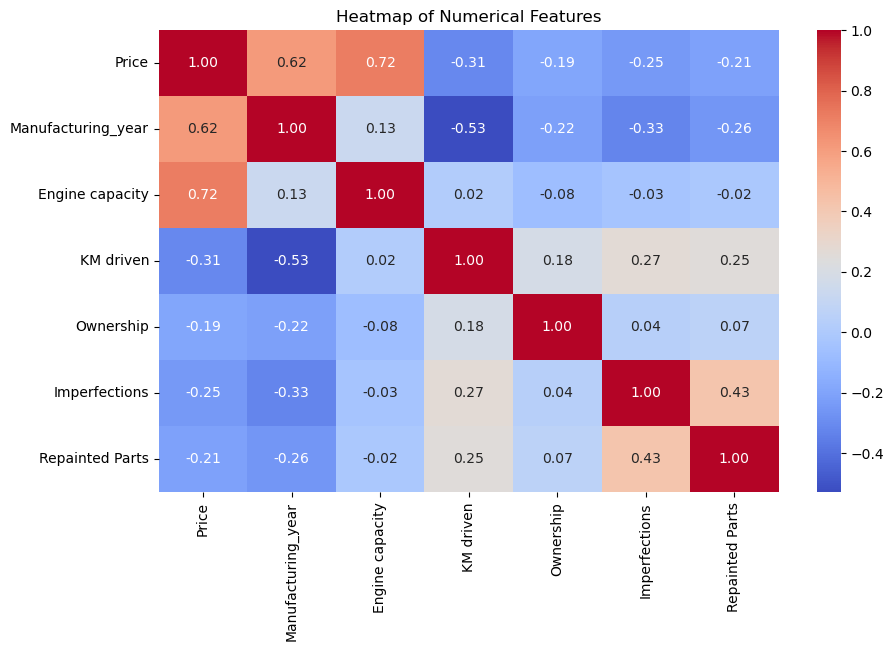

In [5]:
numeric_df = df.select_dtypes(include=["number"])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Numerical Features")
plt.show()

In [6]:
df['Model Name']=df['Model Name'].apply(lambda x: x[12:])
df['Model Name'] = df['Model Name'].apply(lambda x: "Wagon R" if "new wagon-r" in x.lower() else x)

In [7]:
df.sample(3)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
95,IGNIS DELTA 1.2,419000,2017,1197,Yes,Manual,85064,1,Petrol,13,1
1085,Celerio X ZXI (O) AMT,502000,2019,998,Yes,Automatic,27215,2,Petrol,19,2
280,Wagon R 1.0 LXI CNG,376000,2017,998,Yes,Manual,57012,2,CNG,13,2


In [8]:
df['Model Name'] = df['Model Name'].apply(lambda x: x.split()[0])  

In [15]:
df.sample(10)

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
793,Wagon,501000,2019,1197,Yes,Automatic,12716,1,Petrol,23,2
66,Alto,182000,2011,998,No,Manual,50057,1,Petrol,26,7
555,Wagon,614000,2023,1197,Yes,Manual,11054,1,Petrol,8,3
641,Wagon,503000,2021,998,No,Manual,43689,1,CNG,23,2
250,Baleno,581000,2018,1197,Yes,Automatic,33974,1,Petrol,8,4
700,Wagon,334000,2017,998,Yes,Manual,117691,1,CNG,0,0
848,Baleno,618000,2020,1197,Yes,Manual,36095,2,Petrol,9,1
424,IGNIS,381000,2018,1197,Yes,Manual,57747,1,Petrol,26,5
533,Swift,469000,2016,1197,Yes,Manual,62561,1,Petrol,10,5
573,Baleno,453000,2016,1197,Yes,Automatic,81039,1,Petrol,14,2


In [16]:
print("Number of unique values in Model Name attribute", df['Model Name'].nunique())
df['Model Name'].unique()

Number of unique values in Model Name attribute 20


array(['Swift', 'Baleno', 'Ertiga', 'Dzire', 'Alto', 'S', 'Celerio',
       'IGNIS', 'Wagon', 'Ciaz', 'Vitara', 'BREZZA', 'XL6', 'Ritz',
       'Eeco', 'Grand', 'OMNI', 'Zen', 'A', 'Omni'], dtype=object)

In [19]:
df.drop(columns=['Spare key'], inplace=True)


In [20]:
object_cols=[]
for cols in df.select_dtypes(include=['object']).columns:
    object_cols.append(cols)

object_cols

['Model Name', 'Transmission', 'Fuel type']

In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for cols in object_cols:
    df[cols] = encoder.fit_transform(df[cols])

In [22]:
X=df.drop(columns=['Price'])
y=df['Price']

In [23]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [25]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1011, 9)
X_test shape: (434, 9)
y_train shape: (1011,)
y_test shape: (434,)


In [26]:
rf_model_pred=rf_model.predict(X_test)

In [30]:
print("Random Forest Regressor Model Scores:")
print("R2 score:", r2_score(y_test, rf_model_pred))
print("Mean squared error:", mean_squared_error(y_test, rf_model_pred))
print("Mean absolute error:", mean_absolute_error(y_test, rf_model_pred))

Random Forest Regressor Model Scores:
R2 score: 0.8855069513549466
Mean squared error: 4305896980.414746
Mean absolute error: 45559.05529953917


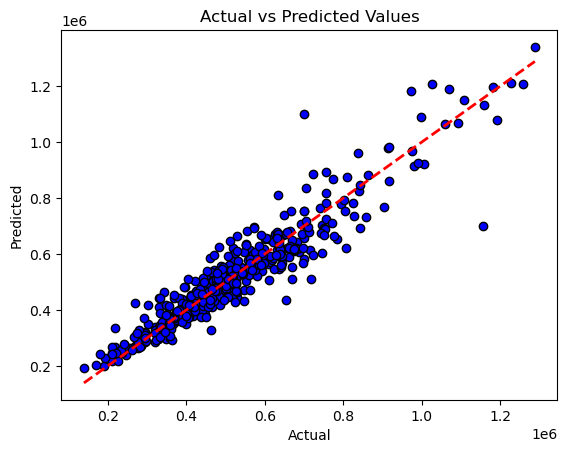

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_test, rf_model_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Display results
print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean accuracy: {cv_scores.mean():.2f}')
print(f'Standard deviation: {cv_scores.std():.2f}')


Cross-validation accuracy scores: [0. 0. 0. 0. 0.]
Mean accuracy: 0.00
Standard deviation: 0.00
